In [1]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("anthony-wss/interpolate-UT")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

df = pd.json_normalize([summary_list[i] | config_list[i] for i in range(len(summary_list))], sep='_')
df.columns

Index(['scel', '_step', 'train_acc', '_timestamp', 'training_loss', 'ure',
       '_runtime', 'test_acc', 'valid_acc', 'lr', 'algo', 'seed', 'alpha',
       'model', 'data_aug', 'dataset_name', 'data_cleaning_rate',
       'best_epoch-scel_epoch', 'best_epoch-scel_test_acc',
       'best_epoch-scel_train_acc', 'best_epoch-scel_valid_acc',
       'best_epoch-scel_training_loss', 'best_epoch-scel_ure',
       'best_epoch-scel_scel', 'best_epoch-ure_training_loss',
       'best_epoch-ure_ure', 'best_epoch-ure_scel', 'best_epoch-ure_epoch',
       'best_epoch-ure_test_acc', 'best_epoch-ure_train_acc',
       'best_epoch-ure_valid_acc', 'best_epoch-valid_acc_ure',
       'best_epoch-valid_acc_scel', 'best_epoch-valid_acc_epoch',
       'best_epoch-valid_acc_test_acc', 'best_epoch-valid_acc_train_acc',
       'best_epoch-valid_acc_valid_acc', 'best_epoch-valid_acc_training_loss',
       '_wandb_runtime'],
      dtype='object')

In [3]:
df['data_cleaning_rate'].value_counts()

data_cleaning_rate
1.00    60
0.75    30
0.50    30
0.25    30
Name: count, dtype: int64

In [2]:
import pandas as pd

for alpha in [0.25, 0.5, 0.75]:
    for data_cleaning_rate in [0.25, 0.5, 0.75, 1]:
        print("alpha", alpha, 'data_cleaning_rate', data_cleaning_rate)
        for dataset_name in ['clcifar10', 'clcifar20']:
            sub_df = df.loc[(df['dataset_name'] == dataset_name) & (df['alpha'] == alpha) & (df['data_cleaning_rate'] == data_cleaning_rate)]
            
            print(
                dataset_name, 
                alpha,
                sub_df.sort_values('valid_acc', ascending=False).iloc[0]['test_acc'],
                sub_df.sort_values('best_epoch-valid_acc_valid_acc', ascending=False).iloc[0]['best_epoch-valid_acc_test_acc']
            )

alpha 0.25 data_cleaning_rate 0.25
clcifar10 0.25 0.3685 0.4098
clcifar20 0.25 0.1533 0.2006
alpha 0.25 data_cleaning_rate 0.5
clcifar10 0.25 0.4297 0.469
clcifar20 0.25 0.1627 0.2008
alpha 0.25 data_cleaning_rate 0.75
clcifar10 0.25 0.5069 0.5348
clcifar20 0.25 0.1883 0.2117
alpha 0.25 data_cleaning_rate 1
clcifar10 0.25 0.5938 0.6316
clcifar20 0.25 0.208 0.2382
alpha 0.5 data_cleaning_rate 0.25
clcifar10 0.5 0.4127 0.4099
clcifar20 0.5 0.1568 0.159
alpha 0.5 data_cleaning_rate 0.5
clcifar10 0.5 0.4437 0.4713
clcifar20 0.5 0.141 0.1671
alpha 0.5 data_cleaning_rate 0.75
clcifar10 0.5 0.5377 0.546
clcifar20 0.5 0.169 0.2017
alpha 0.5 data_cleaning_rate 1
clcifar10 0.5 0.633 0.6397
clcifar20 0.5 0.188 0.2265
alpha 0.75 data_cleaning_rate 0.25
clcifar10 0.75 0.411 0.4124
clcifar20 0.75 0.1339 0.1349
alpha 0.75 data_cleaning_rate 0.5
clcifar10 0.75 0.4642 0.4902
clcifar20 0.75 0.1313 0.1472
alpha 0.75 data_cleaning_rate 0.75
clcifar10 0.75 0.534 0.5276
clcifar20 0.75 0.1447 0.1599
alpha 0.

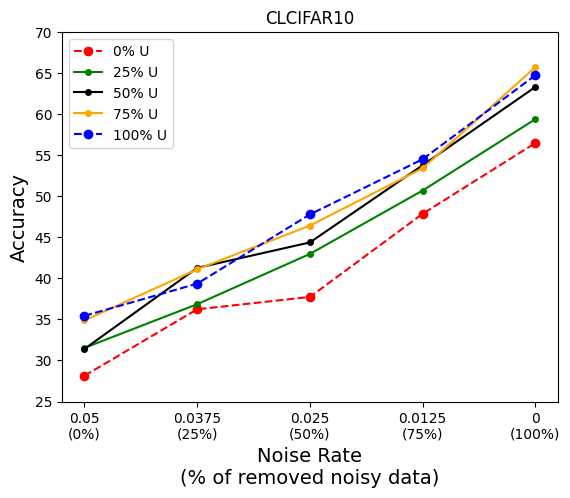

In [17]:
# fwd-r, 25% U + 75% T, ..., fwd-U
clcifar10_alpha_0 = [28.14, 36.23, 37.73, 47.86, 56.47]
clcifar10_alpha_25 = [31.53, 36.85, 42.97, 50.69, 59.38]
clcifar10_alpha_50 = [31.4, 41.27, 44.37, 53.77, 63.3]
clcifar10_alpha_75 = [34.87, 41.1, 46.42, 53.4, 65.71]
clcifar10_alpha_100 = [35.43, 39.35, 47.78, 54.5, 64.72]

import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots()
ax.plot(clcifar10_alpha_0, linestyle='--', marker='o', color='red', label='0% U')
ax.plot(clcifar10_alpha_25, marker="o", markersize=4, color='green', label='25% U')
ax.plot(clcifar10_alpha_50, marker="o", markersize=4, color='black', label='50% U')
ax.plot(clcifar10_alpha_75, marker="o", markersize=4, color='orange', label='75% U')
ax.plot(clcifar10_alpha_100, linestyle='--', marker='o', color='blue', label='100% U')

xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]

# Add labels and legend
ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)

ax.set_xticks(range(len(clcifar10_alpha_100)))
ax.set_xticklabels(xticks)

yticks = list(range(25, 71, 5))
ax.set_yticks(yticks)

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('CLCIFAR10')
ax.legend()

plt.savefig("./graph/fwd-int-clcifar10.png", bbox_inches='tight')
plt.show()


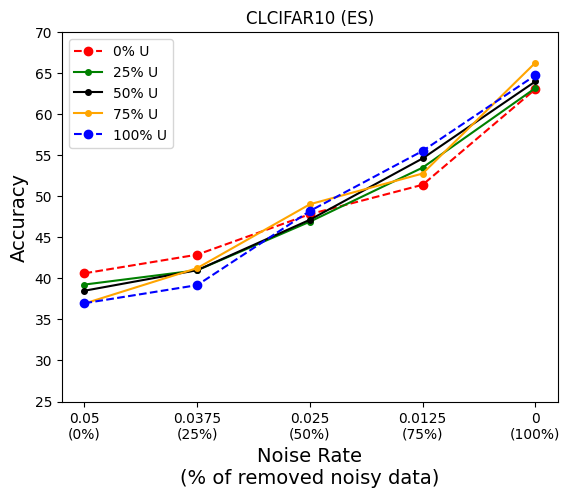

In [18]:
# fwd-r, 25% U + 75% T, ..., fwd-U
clcifar10_alpha_0_es = [40.61, 42.88, 47.81, 51.39, 63.03]
clcifar10_alpha_25_es = [39.24, 40.98, 46.9, 53.48, 63.16]
clcifar10_alpha_50_es = [38.49, 40.99, 47.13, 54.6, 63.97]
clcifar10_alpha_75_es = [36.93, 41.24, 49.02, 52.76, 66.25]
clcifar10_alpha_100_es = [36.97, 39.17, 48.2, 55.51, 64.72]

import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots()
ax.plot(clcifar10_alpha_0_es, linestyle='--', marker='o', color='red', label='0% U')
ax.plot(clcifar10_alpha_25_es, marker="o", markersize=4, color='green', label='25% U')
ax.plot(clcifar10_alpha_50_es, marker="o", markersize=4, color='black', label='50% U')
ax.plot(clcifar10_alpha_75_es, marker="o", markersize=4, color='orange', label='75% U')
ax.plot(clcifar10_alpha_100_es, linestyle='--', marker='o', color='blue', label='100% U')
# ax.plot(fwd_r_es, linestyle='--', marker='^', color='red', label='fwd-r(ES)')
# ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]
# ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
# ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

# Add labels and legend
ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)

ax.set_xticks(range(len(clcifar10_alpha_100_es)))
ax.set_xticklabels(xticks)

yticks = list(range(25, 71, 5))
ax.set_yticks(yticks)

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('CLCIFAR10 (ES)')
ax.legend()

plt.savefig("./graph/fwd-int-clcifar10-es.png", bbox_inches='tight')
plt.show()


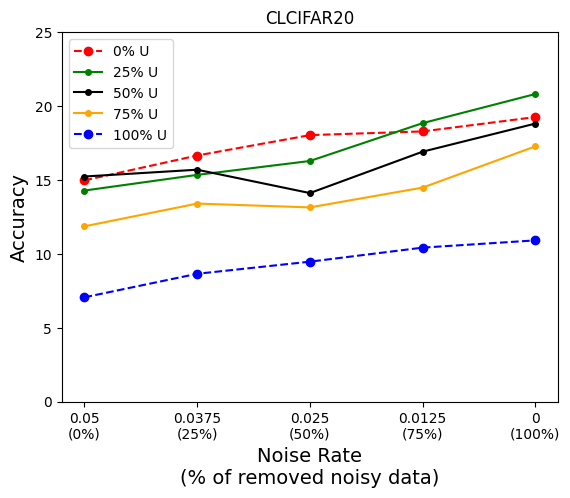

In [19]:
# fwd-r, 25% U + 75% T, ..., fwd-U
clcifar20_alpha_0 = [14.96, 16.64, 18.02, 18.27, 19.24]
clcifar20_alpha_25 = [14.27, 15.33, 16.27, 18.83, 20.8]
clcifar20_alpha_50 = [15.22, 15.68, 14.1, 16.9, 18.8]
clcifar20_alpha_75 = [11.85, 13.39, 13.13, 14.47, 17.26]
clcifar20_alpha_100 = [7.05, 8.64, 9.46, 10.41, 10.9]

import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots()
ax.plot(clcifar20_alpha_0, linestyle='--', marker='o', color='red', label='0% U')
ax.plot(clcifar20_alpha_25, marker="o", markersize=4, color='green', label='25% U')
ax.plot(clcifar20_alpha_50, marker="o", markersize=4, color='black', label='50% U')
ax.plot(clcifar20_alpha_75, marker="o", markersize=4, color='orange', label='75% U')
ax.plot(clcifar20_alpha_100, linestyle='--', marker='o', color='blue', label='100% U')
# ax.plot(fwd_r_es, linestyle='--', marker='^', color='red', label='fwd-r(ES)')
# ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]
# ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
# ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

# Add labels and legend
ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)

ax.set_xticks(range(len(clcifar20_alpha_100)))
ax.set_xticklabels(xticks)

yticks = list(range(0, 30, 5))
ax.set_yticks(yticks)

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('CLCIFAR20')
ax.legend()

plt.savefig("./graph/fwd-int-clcifar20.png", bbox_inches='tight')
plt.show()


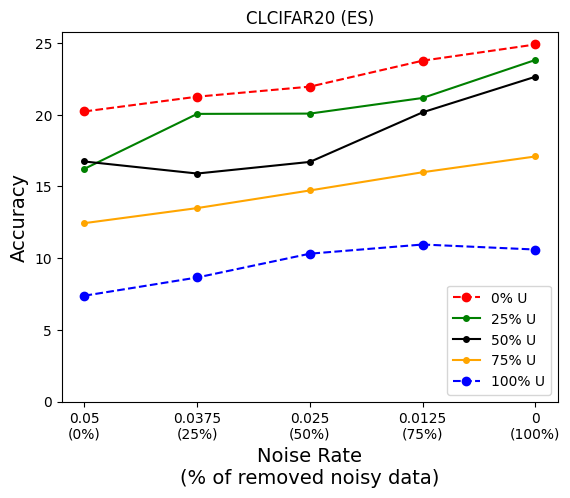

In [20]:
clcifar20_alpha_0_es = [20.23, 21.26, 21.96, 23.77, 24.9]
clcifar20_alpha_25_es = [16.23, 20.06, 20.08, 21.17, 23.82]
clcifar20_alpha_50_es = [16.74, 15.9, 16.71, 20.17, 22.65]
clcifar20_alpha_75_es = [12.44, 13.49, 14.72, 15.99, 17.09]
clcifar20_alpha_100_es = [7.38, 8.65, 10.31, 10.95, 10.6]

import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots()
ax.plot(clcifar20_alpha_0_es, linestyle='--', marker='o', color='red', label='0% U')
ax.plot(clcifar20_alpha_25_es, marker="o", markersize=4, color='green', label='25% U')
ax.plot(clcifar20_alpha_50_es, marker="o", markersize=4, color='black', label='50% U')
ax.plot(clcifar20_alpha_75_es, marker="o", markersize=4, color='orange', label='75% U')
ax.plot(clcifar20_alpha_100_es, linestyle='--', marker='o', color='blue', label='100% U')
# ax.plot(fwd_r_es, linestyle='--', marker='^', color='red', label='fwd-r(ES)')
# ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]
# ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
# ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

# Add labels and legend
ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)
ax.set_xticks(range(len(clcifar20_alpha_100)))
ax.set_xticklabels(xticks)
yticks = list(range(0, 30, 5))
ax.set_yticks(yticks)

ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('CLCIFAR20 (ES)')
ax.legend()

plt.savefig("./graph/fwd-int-clcifar20-es.png", bbox_inches='tight')
plt.show()

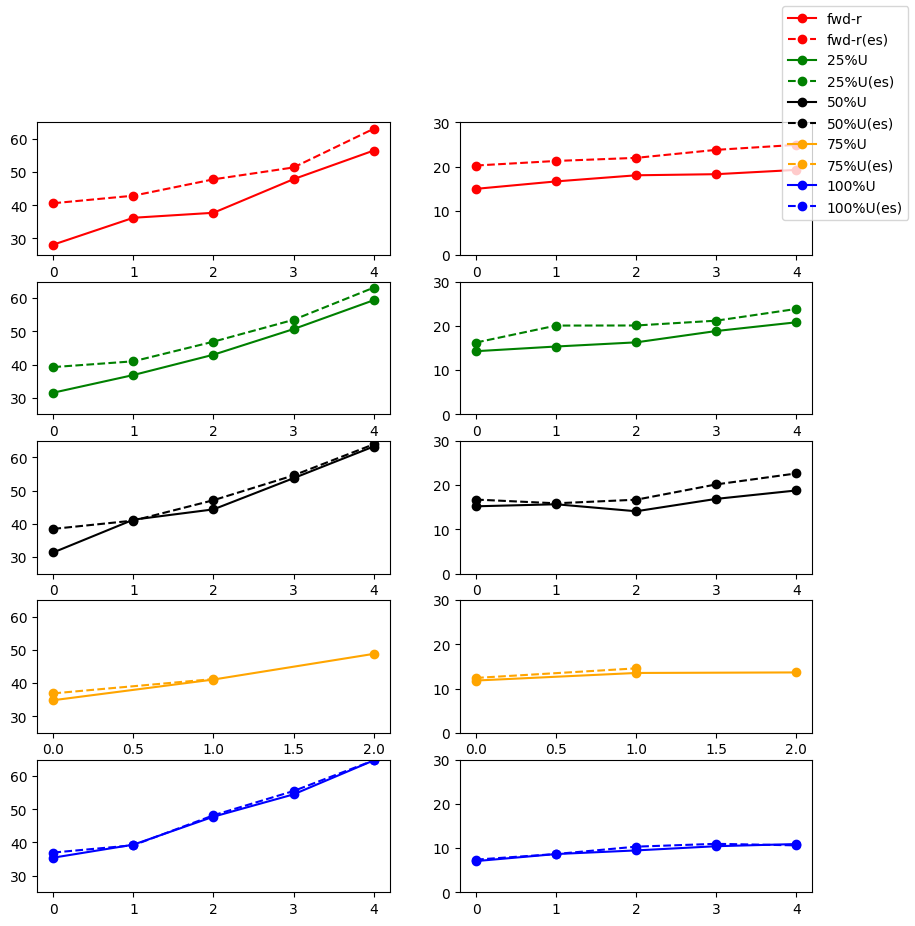

In [31]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))  # Create a 5x2 grid of subplots

axes[0, 0].plot(clcifar10_alpha_0, linestyle='solid', marker='o', color='red', label='fwd-r')
axes[0, 0].plot(clcifar10_alpha_0_es, linestyle='--', marker='o', color='red', label='fwd-r(es)')
axes[1, 0].plot(clcifar10_alpha_25, linestyle='solid', marker='o', color='green', label='25%U')
axes[1, 0].plot(clcifar10_alpha_25_es, linestyle='--', marker='o', color='green', label='25%U(es)')
axes[2, 0].plot(clcifar10_alpha_50, linestyle='solid', marker='o', color='black', label='50%U')
axes[2, 0].plot(clcifar10_alpha_50_es, linestyle='--', marker='o', color='black', label='50%U(es)')
axes[3, 0].plot(clcifar10_alpha_75, linestyle='solid', marker='o', color='orange', label='75%U')
axes[3, 0].plot(clcifar10_alpha_75_es, linestyle='--', marker='o', color='orange', label='75%U(es)')
axes[4, 0].plot(clcifar10_alpha_100, linestyle='solid', marker='o', color='blue', label='100%U')
axes[4, 0].plot(clcifar10_alpha_100_es, linestyle='--', marker='o', color='blue', label='100%U(es)')

axes[0, 1].plot(clcifar20_alpha_0, linestyle='solid', marker='o', color='red')
axes[0, 1].plot(clcifar20_alpha_0_es, linestyle='--', marker='o', color='red')
axes[1, 1].plot(clcifar20_alpha_25, linestyle='solid', marker='o', color='green')
axes[1, 1].plot(clcifar20_alpha_25_es, linestyle='--', marker='o', color='green')
axes[2, 1].plot(clcifar20_alpha_50, linestyle='solid', marker='o', color='black')
axes[2, 1].plot(clcifar20_alpha_50_es, linestyle='--', marker='o', color='black')
axes[3, 1].plot(clcifar20_alpha_75, linestyle='solid', marker='o', color='orange')
axes[3, 1].plot(clcifar20_alpha_75_es, linestyle='--', marker='o', color='orange')
axes[4, 1].plot(clcifar20_alpha_100, linestyle='solid', marker='o', color='blue')
axes[4, 1].plot(clcifar20_alpha_100_es, linestyle='--', marker='o', color='blue')

fig.legend()
for i in range(5):
    axes[i, 0].set_ylim(25, 65)
    axes[i, 1].set_ylim(0, 30)

plt.show()

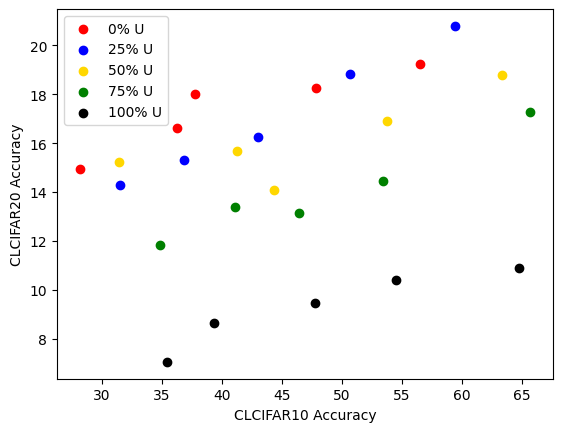

In [5]:
import matplotlib.pyplot as plt

clcifar10_alpha_0 = [28.14, 36.23, 37.73, 47.86, 56.47]
clcifar10_alpha_25 = [31.53, 36.85, 42.97, 50.69, 59.38]
clcifar10_alpha_50 = [31.4, 41.27, 44.37, 53.77, 63.3]
clcifar10_alpha_75 = [34.87, 41.1, 46.42, 53.4, 65.71]
clcifar10_alpha_100 = [35.43, 39.35, 47.78, 54.5, 64.72]

clcifar20_alpha_0 = [14.96, 16.64, 18.02, 18.27, 19.24]
clcifar20_alpha_25 = [14.27, 15.33, 16.27, 18.83, 20.8]
clcifar20_alpha_50 = [15.22, 15.68, 14.1, 16.9, 18.8]
clcifar20_alpha_75 = [11.85, 13.39, 13.13, 14.47, 17.26]
clcifar20_alpha_100 = [7.05, 8.64, 9.46, 10.41, 10.9]

for x, y, c, l in [[clcifar10_alpha_0, clcifar20_alpha_0, 'red', '0% U'], [clcifar10_alpha_25, clcifar20_alpha_25, 'blue', '25% U'], [clcifar10_alpha_50, clcifar20_alpha_50, 'gold', '50% U'], [clcifar10_alpha_75, clcifar20_alpha_75, 'green', '75% U'], [clcifar10_alpha_100, clcifar20_alpha_100, 'black', '100% U']]:
    plt.scatter([x[i] for i in range(5)], [y[i] for i in range(5)], color=c, label=l)

plt.xlabel('CLCIFAR10 Accuracy')
plt.ylabel('CLCIFAR20 Accuracy')
plt.legend()

plt.show()